# Homework 7 (50 points)

In this Homework, we will try to classify observations of space to be either stars, galaxies or quasars based on the RD14 from the Sloan Digital Sky Survey  (SDSS). The Sloan Digital Sky Survey is a project which offers public data of space observations. Observations have been made since 1998 and have been made accessible to everyone who is interested. 

http://www.sdss.org/
![alt text](http://www.fingerprintdigitalmedia.com/wp-content/uploads/2014/08/sdss1.jpg)

For this purpose a special 2.5 m diameter telescope was built at the Apache Point Observatory in New Mexico, USA. The telescope uses a camera of 30 CCD-Chips with 2048x2048 image points each. The chips are ordered in 5 rows with 6 chips in each row. Each row observes the space through different optical filters (u, g, r, i, z) at wavelengths of approximately 354, 476, 628, 769, 925 nm.


In this homework we will train several classifier to predict the class of a celestial object based on the observations (features). We will practice data prep, dimensionality reduction, model design and training, model comparison, and feature importance selection.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


## 1) Data Preparation (20 points)

We follow the following steps:
* read (1 point)
* clean (3 points)
* correlate (4 points)
* explore, spread of values (3 points)
* dimensionality reduction (9 points)

### 1.1 Data read
Read the pandas fata frame from the csv file "Skyserver_SQL2_27_2018.csv" and skip the first row.

**Task: read (1 point)**

Save a copy of the data frame just in case.

In [2]:
# answer
#tpath= " ~/MLGeo2022_velgueta/Homework7/Skyserver_SQL2_27_2018.csv"
Data= pd.read_csv("Skyserver_SQL2_27_2018.csv")[1:]




**Description of the data fields**

* objid = Object Identifier, self explanatory.
* ra = J2000 Right Ascension (r-band). Angular that is measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question.   https://en.wikipedia.org/wiki/Right_ascension
* dec = J2000 Declination (r-band). Angle that is measured north or south of the celestial equator, along the hour circle passing through the point in question. https://en.wikipedia.org/wiki/Declination



The Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further Information: http://astroweb.case.edu/ssm/ASTR620/mags.html 
* u = better of DeV/Exp magnitude fit
* g = better of DeV/Exp magnitude fit
* r = better of DeV/Exp magnitude fit
* i = better of DeV/Exp magnitude fit
* z = better of DeV/Exp magnitude fit




Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. 
* run = Run Number, which identifies the specific scan. 
* rereun = Rerun Number, which specifies how the image was processed.
* camcol = Camera column, a number from 1 to 6, identifying the scanline within the run.
* field = Field number, which typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
* specobjid = Object Identifier
* class = object class (galaxy, star or quasar object): The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

* redshift = Final Redshift: In physics, **redshift** happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum. 

* plate = plate number: Each spectroscopic exposure employs a large, thin, circular metal **plate** that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

* mjd = MJD of observation, **Modified Julian Date**, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.
* fiberid = fiber ID. The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding **fiberID**. 

**Further information on SDSS images and their attributes:** 

http://www.sdss3.org/dr9/imaging/imaging_basics.php

http://www.sdss3.org/dr8/glossary.php

### 1.2 Data Cleaning 

Basic stats about our dataset. 

**Task: Provide basic infor for the pandas dataframe head (0.5 point)**

In [3]:
# head
Data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594


**Task: Find the data types of the database (floats, string, etc etc) using the ``info()`` function (0.5 point).**

In [4]:
# information
Data.info()
list(Data.keys())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 1 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      9999 non-null   float64
 1   ra         9999 non-null   float64
 2   dec        9999 non-null   float64
 3   u          9999 non-null   float64
 4   g          9999 non-null   float64
 5   r          9999 non-null   float64
 6   i          9999 non-null   float64
 7   z          9999 non-null   float64
 8   run        9999 non-null   int64  
 9   rerun      9999 non-null   int64  
 10  camcol     9999 non-null   int64  
 11  field      9999 non-null   int64  
 12  specobjid  9999 non-null   float64
 13  class      9999 non-null   object 
 14  redshift   9999 non-null   float64
 15  plate      9999 non-null   int64  
 16  mjd        9999 non-null   int64  
 17  fiberid    9999 non-null   int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


['objid',
 'ra',
 'dec',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run',
 'rerun',
 'camcol',
 'field',
 'specobjid',
 'class',
 'redshift',
 'plate',
 'mjd',
 'fiberid']

Are there any obvious feature (or element of the dataframe) that should not impact our prediction?
 
**objid** and **specobjid** are just identifiers for accessing the rows back when they were stored in the original databank. Therefore we will not need them for classification as they are not related to the outcome.
The features **run**, **rerun**, **camcol** and **field** are values which describe parts of the camera at the moment when making the observation, e.g. 'run' represents the corresponding scan which captured the oject.

Source: http://www.sdss3.org/dr9/imaging/imaging_basics.php

**Task: Drop these columns in the pandas dataframe. (1 point)**

In [5]:
# answer
Data.drop("run", inplace=True, axis=1)
Data.drop("rerun", inplace=True,axis=1)
Data.drop("camcol", inplace=True,axis=1)
Data.drop("field", inplace=True,axis=1)
Data.drop("objid", inplace=True,axis=1)
Data.drop("specobjid", inplace=True,axis=1)
Data.head()



,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,STAR,0.000315,324,51666,594


Find our how many examples there are, how many attributes or feature, and the type of class.

['GALAXY' 'QSO' 'STAR']
3


(array([4151.,    0.,    0.,    0.,    0., 4998.,    0.,    0.,    0.,
         850.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

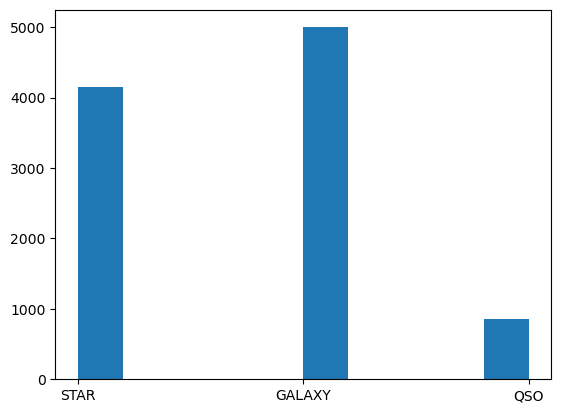

In [6]:
# description
labels = Data['class']
Data.describe()
print(np.unique(labels))
print(len(np.unique(labels)))
plt.hist(labels)

**Task: How many objects are in each class? (1 point)**

In [7]:
# Count the elements in each class
labels.value_counts()

GALAXY    4998
STAR      4151
QSO        850
Name: class, dtype: int64

The classes are "GALAXY", "STAR", and "QSO" (quasars). They are defined as strings, but we will convert them to integer in order to apply a loss function on the class labels during training. For this, we use the ``sklearn.preprocessing.LabelEncoder()`` function. We will do so and modify the classes in the dataframe. We should keep a copy of the original data frame to be safe.

In [8]:
sdss_df_save = Data # make a copy of the original data before cleaning it. That works well when the data is small.

# encode class labels to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(Data['class'])
Data['class'] = y_encoded
#  GALAXY = 0
# STAR = 1
# QSO = 2

### 1.3 Data correlations
Now let's find the most basic correlations among features. This can be done using the ``corr()`` function to apply on the pandas dataframe. Evaluate this function and comment on what feature is correlated among others. It is convenient to use the matplotlib function ``matshow()`` for clarity. ``seaborn`` is a python module that makes really pretty statistical plots https://seaborn.pydata.org/index.html#. Install it with ``pip`` and import it.

**Task: Plot the correlation matrix that can be called in the pandas dataframe. (2 points)**

Hints:

Use functions of ``heatmap``, add the labels in the axes. The colormap ``coolwarm`` is nice for divergent scales like correlations that vary between -1 and 1. The argument ``center=0`` ensures that the colormap is divergent from zero. Make sure to ignore the label column "class". Remember that dropping a column can be done in place ``sdss_df.drop('class', axis=1)``.

Text(0, 0.5, 'variables data')

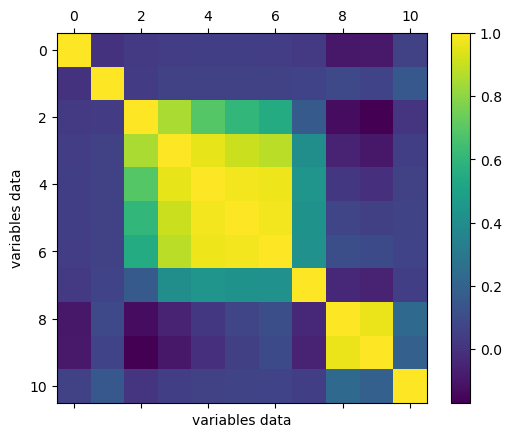

In [9]:
# answer
import seaborn as sns

corrdata=Data.drop('class', axis=1).corr(method='pearson',numeric_only=True)
#fig=plt.matshow(corrdata)
#fig.colorbar()
 
plt.show()
fig=plt.figure()
axx=fig.add_subplot(111)
barc=axx.matshow(corrdata)
fig.colorbar(barc)
plt.xlabel("variables data")
plt.ylabel("variables data")

<AxesSubplot: >

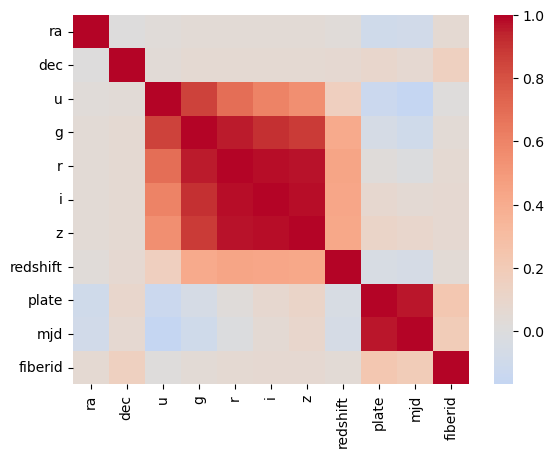

In [10]:

sns.heatmap(corrdata, cmap="coolwarm", center=0)

**Task: Reproduce the same plot for each of the three classes. (1 point)**
You can select the values from the pandas dataframe by selecting over the column 'class'. 

Text(0.5, 1.0, 'Galaxy')

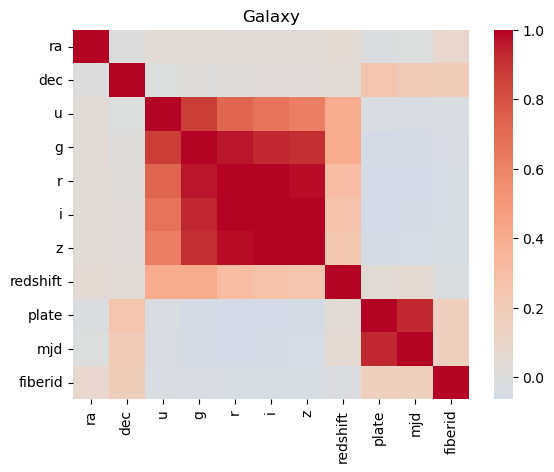

In [11]:
import seaborn as sns

corrdata=Data[Data['class']==0].drop('class', axis=1).corr(method='pearson',numeric_only=True)
fig=sns.heatmap(corrdata, cmap="coolwarm", center=0)
fig.set_title('Galaxy')

Text(0.5, 1.0, 'Stars')

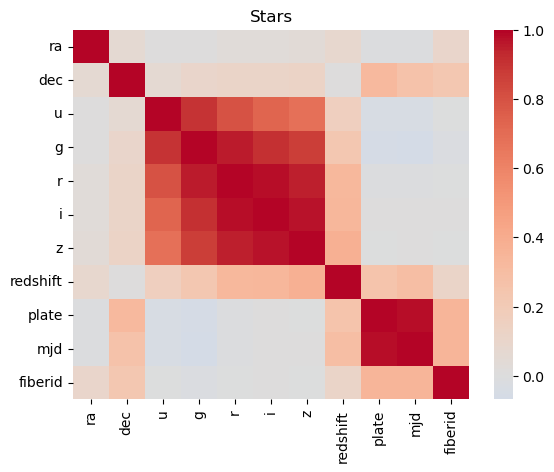

In [12]:
# Make the same plot for Stars (label 1)
corrdata=Data[Data['class']==1].drop('class', axis=1).corr(method='pearson',numeric_only=True)
fig=sns.heatmap(corrdata, cmap="coolwarm", center=0)
fig.set_title('Stars')

Text(0.5, 1.0, 'Quasars')

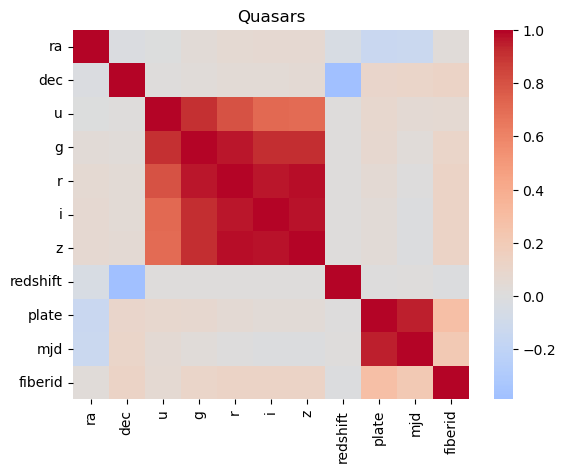

In [13]:
# make the same plot for Galaxies
# "GALAXY" is label 0




# make the same plots for quasars (label 2)
corrdata=Data[Data['class']==2].drop('class', axis=1).corr(method='pearson',numeric_only=True)
fig=sns.heatmap(corrdata, cmap="coolwarm", center=0)
fig.set_title('Quasars')

**Task: Can you comment on groups of observations that can be grouped together or that appear independent from each other given these correlations, and if there is any difference between the three celestial objects? (**1 point**)**

we can see that the three plots looks very similar, as mjd is correlated with plate in each plots. Also, 
u, g, r, i, z are correlated in the three plots.


### 1.5 Data exploration
Given the structure of the correlations, we will explore the values of the data.

#### 1.5.a. Distributions of redshift
"redshifting" happens when the source of light is becoming more distant to the receiver: the object is moving away from Earth. 

**Task: plot histograms for the 'redshift' feature column for each class (1 point).**

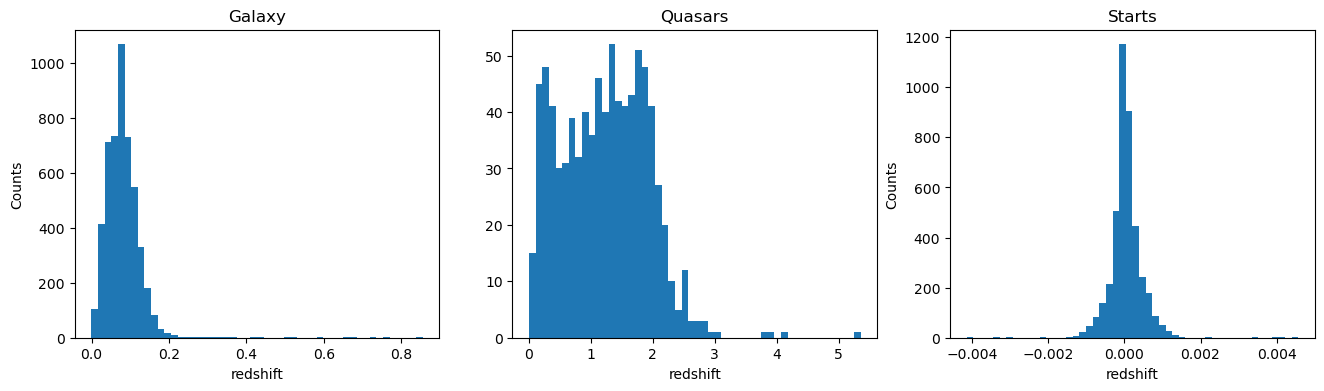

In [14]:
# answer galaxy
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
label0=Data[Data['class']==0]
label1=Data[Data['class']==1]
label2=Data[Data['class']==2]
#plt.hist(label1)
axes[0].hist(label0['redshift'], 50);
axes[0].set_title('Galaxy');
axes[0].set_xlabel('redshift');
axes[0].set_ylabel('Counts');
axes[1].hist(label1['redshift'], 50);
axes[1].set_title('Quasars');
axes[1].set_xlabel('redshift');
axes[2].set_ylabel('Counts');
axes[2].hist(label2['redshift'], 50);
axes[2].set_title('Starts');
axes[2].set_xlabel('redshift');
axes[2].set_ylabel('Counts');

**Task : Describe briefly the difference between the three histograms. (0.5 point)**

<!-- # answer -->
* **Star:** The histogram looks like a truncated zero-centered normal distribution. It looks like stars are both coming toward and away from the Earth.

* **Galaxy:** The redshift values may come from a slightly right-shifted normal distribution which is centered around 0.075. It looks like galaxies are moving away from the Earth but at slow speeds.

* **QSO:** The redshift values for QSOs are a lot more uniformly distributed than for Stars or Galaxies. They are roughly evenly distributed from 0 to 3, than the occurences decrease drastically. For 4 oder ~5.5 there are some outliers. This probably means that quasards are moving away from the earth with a diverse range of speeds.


#### 1.5.b. Right ascension (ra) and declination (dec) 

We will now plot the right ascension versus the declination depending on the class. You can use the ``lmplot`` function in ``seaborn`` (https://seaborn.pydata.org/generated/seaborn.lmplot.html) to represent the sky view of these objects.

Text(0.5, 1.0, 'Equatorial coordinates')

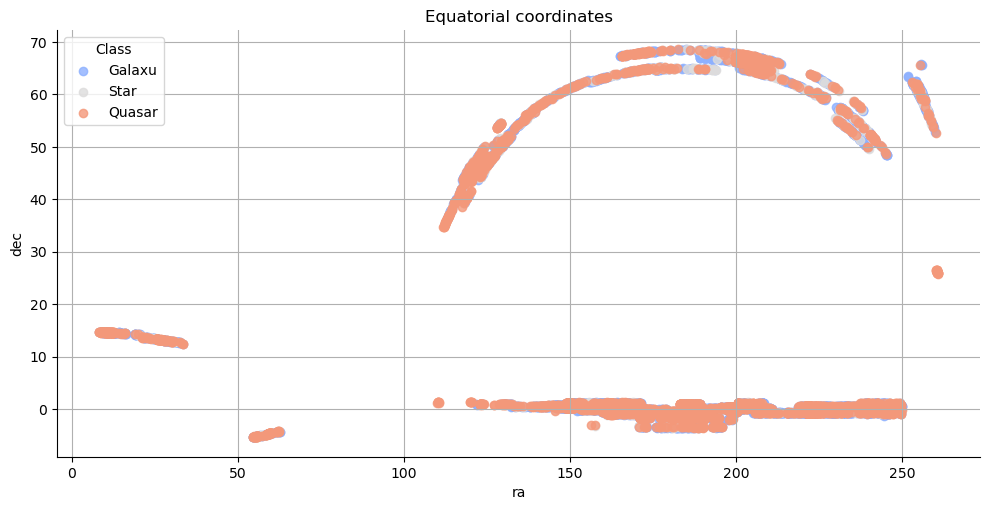

In [15]:
sns.lmplot(x='ra', y='dec', data=Data, hue='class', fit_reg=False, palette='coolwarm', aspect=2,legend=False)
plt.legend(title='Class', loc='upper left', labels=['Galaxu', 'Star','Quasar'])
plt.grid(True)
plt.title('Equatorial coordinates')

**Task: do you see any obvious differences such that one could easily discriminate between the two coordinates? (0.5 point)**

According to the plot, I can not see any obvious difference between the dec and radiates. The coordinates mostly overlap.

#### 1.5.c Filters - u,g,r,i,z 

Recall: u, g, r, i, z represent the different wavelengths which are used to capture the observations. According to the correlation matrix, they are correlated for all three classes.

Therefore it is interesting to see that band 'u' is less correlated to the other bands. 

**Task Plot histograms and discuss why you expect these features to be correlated (1 points)**

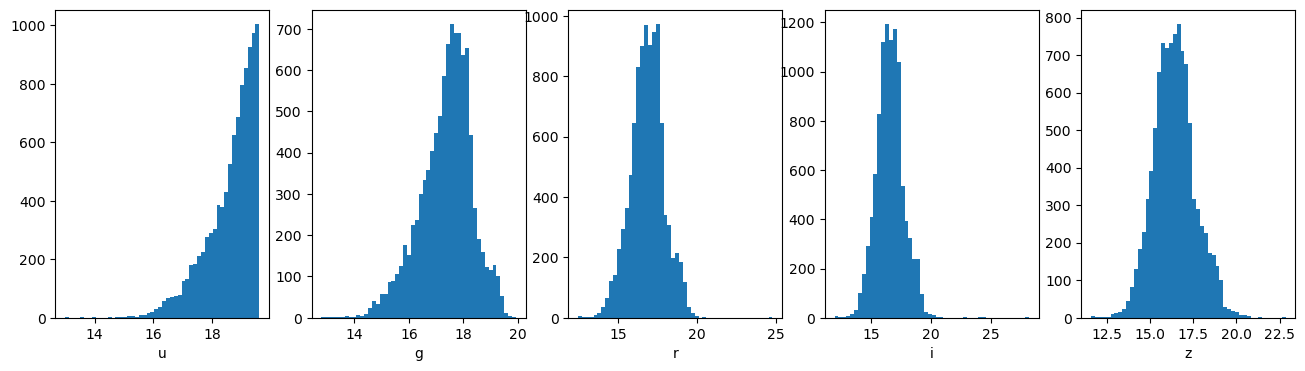

In [16]:
# Plot of histograms
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(16, 4))
axes[0].hist(Data['u'], 50);
axes[0].set_xlabel('u');
axes[1].hist(Data['g'], 50);
axes[1].set_xlabel('g');
axes[2].hist(Data['r'], 50);
axes[2].set_xlabel('r');
axes[3].hist(Data['i'], 50);
axes[3].set_xlabel('i');
axes[4].hist(Data['z'], 50);
axes[4].set_xlabel('z');

<!-- Anwer: -->

#discussion

### 1.6 Data Dimensionality Reduction
At this point, we are left with 8 features: redshift, u, g, r, i, z, ra, and dec. Among these, the filters (u, g, r, i, z) are correlated to each other. There is therefore a potential for reducing the dimensions of the features using PCA on these 5 features.

We will use the skilearn function ``sklearn.decomposition.PCA()`` to fit and transform the data into the PC coordinates. Lets' first explore how many PCs we need. Fit the PCA function over the total number of filters. You will fit the PCA function over an array with the columns selected from the dataframe. 

**Task: Perform the PCA over a max number of PCs, output the explained variance ratio values, decide on an appropriate maximum number of PC to use (6 points)**

In [17]:
# anwer
# Import useful module
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as ln
import pandas as pd
from matplotlib import cm
%matplotlib inline
from sklearn.decomposition import PCA

Datapca=np.asarray(Data[["u", "g" ,"r","i", "z"]])
print(Datapca)
pca=PCA(n_components=5).fit(Datapca)
print(pca.components_)
print(pca.explained_variance_ratio_)

[[18.6628  17.21449 16.67637 16.48922 16.3915 ]
 [19.38298 18.19169 17.47428 17.08732 16.80125]
 [17.76536 16.60272 16.16116 15.98233 15.90438]
 ...
 [18.75818 17.77784 17.51872 17.43302 17.42048]
 [18.88287 17.91068 17.53152 17.36284 17.13988]
 [19.27586 17.37829 16.30542 15.83548 15.50588]]
[[ 0.26873872  0.41063677  0.47828662  0.50441387  0.52532419]
 [-0.82283688 -0.32414469  0.04436024  0.25716208  0.38700068]
 [-0.46967673  0.56871658  0.45952525 -0.16136623 -0.46772076]
 [ 0.01243071 -0.08370744 -0.17048856  0.80635743 -0.55996419]
 [ 0.17311332 -0.6291758   0.7273543  -0.05641763 -0.20479836]]
[0.90268347 0.08750475 0.00457928 0.00409802 0.00113449]


*Answer on how many PCs to use*
As we can see, the variances ratio using PCA are [0.90268347 0.08750475 0.00457928 0.00409802 0.00113449]. The last three variances are so small, so I decided just use 2 components.


We will now re-perform PCA with the number of PCs you found is most appropriate. Re-apply the fit-transform function. Update the dataframe by adding the PCA value(s) and dropping the columns of the 5 filter features.

**Task: PCA again, fit and transform, update the dataframe with the new feature(s) (3 points)**

In [18]:
# answer
pca_2=PCA(n_components=2).fit(Datapca)
print(pca_2.components_)
print(pca_2.explained_variance_ratio_)

[[ 0.26873872  0.41063677  0.47828662  0.50441387  0.52532419]
 [-0.82283688 -0.32414469  0.04436024  0.25716208  0.38700068]]
[0.90268347 0.08750475]


In [19]:
# answer
pca_2=PCA(n_components=2).fit(Datapca)
Data.drop("u", inplace=True, axis=1)
Data.drop("g", inplace=True,axis=1)
Data.drop("r", inplace=True,axis=1)
Data.drop("i", inplace=True,axis=1)
Data.drop("z", inplace=True,axis=1)
Data['pca1'] = pca_2.transform(Datapca)[:,0]
Data['pca2'] = pca_2.transform(Datapca)[:,1]
Data.head()

,ra,dec,class,redshift,plate,mjd,fiberid,pca1,pca2
1,183.598370,0.135285,2,-0.000055,323,51615,541,-0.195906,-0.028545
2,183.680207,0.126185,0,0.123111,287,52023,513,1.297480,-0.590112
3,183.870529,0.049911,2,-0.000111,3306,54922,510,-1.446294,0.566480
4,183.883288,0.102557,2,0.000590,3306,54922,512,-0.849479,1.287360
5,183.847174,0.173694,2,0.000315,324,51666,594,2.873346,0.029723


## 2) Machine Learning Models (26 points)

We will now train different models on this dataset. We have a total of 8 features, 3 classes, and 10,000 samples. We will use K-Nearest Neighbors, Naive Bayes, Random Forest, Support Vector Machine, Multi Layer Perceptron.

We now follow a normal machine learning workflow:
* Feature scaling (2 points)
* Train/test set split (2 points)
* Model design, training, testing (15 points)
* Model comparisons, pick your winner, discuss feature importance using Random Forest. (10 points)

### 2.1 Feature Scaling
Scaling all values to be within the (0, 1) interval will reduce the distortion due to exceptionally high values and make some algorithms converge faster. You can scale the features only by dropping the "class" column without modifying the dataframe in place, using the pandas function ``drop()``.

**Task: Scale just the features (2 points)**

In [20]:
# answer
from sklearn.preprocessing import MinMaxScaler

Dataf=Data.drop('class', inplace=False,axis=1)
normalization=  MinMaxScaler()
datan= normalization.fit_transform(Dataf)

print(datan)


[[6.94097640e-01 7.46422070e-02 7.61699432e-04 ... 5.40540541e-01
  4.48115898e-01 2.15273724e-01]
 [6.94421555e-01 7.45191099e-02 2.37490694e-02 ... 5.12512513e-01
  5.18972259e-01 1.54527621e-01]
 [6.95174861e-01 7.34873275e-02 7.51300757e-04 ... 5.09509510e-01
  3.88788977e-01 2.79639064e-01]
 ...
 [4.88097418e-01 7.71724013e-01 6.96997371e-04 ... 6.21621622e-01
  5.27658697e-01 2.60403629e-01]
 [4.87798936e-01 7.72888457e-01 3.38840082e-03 ... 2.28228228e-01
  5.23453695e-01 2.31009806e-01]
 [4.88542500e-01 7.73595116e-01 2.28730132e-02 ... 2.32232232e-01
  4.12986374e-01 9.79226839e-02]]


### 2.2 Test, train, validation data sets.
**Task: Split the data into a training and a test part.  (2 points)**

The models will be trained on the training data set and tested on the test data set

In [21]:
# answer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    datan, Data['class'], test_size=0.5, shuffle=False )

Computation time is important to account for when scaling up the data set and the model size. You can evaluate the relative computational time using the function ``time.perf_counter()`` to evaluate the absolute time. Then compare the computational time by making the difference between two time stamps:

``t1=time.perf_counter()``

``t2=time.perf_counter()``

``tcomp = t2 - t1``

We will also assess the model performance of these multi-class classifiers. We will evaluate the average of the scores over the 3 class labels.

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_predict
label_name = ['Star','Galaxy','Quasar']

In the following, we will be testing over several classifiers. Follow the steps:
1. model definition/design
2. training
3. prediction on test
4. evaluation: a) print the classification_report; b) save the precision, recall, fscore and accuracy in variables

### 2.3.a K Nearest Neighbors (3 points)
Check out the function arguments and definition here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [23]:
#answer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
print("Classifying using K-nearest Neighbors")



# model design
knn_clf = KNeighborsClassifier()
# training
knn_clf.fit(X_train, y_train)
# evaluation on test
knn_prediction = knn_clf.predict(X_test)
# print the classification report
print(classification_report(y_test,knn_prediction))
print("K-nearest Neighbors Accuracy:", metrics.accuracy_score(y_true=y_test ,y_pred=knn_prediction))

# save values of precision, recall, fscore, accuracy.
[precisionK, recallK, fscoreK, supportK]= metrics.precision_recall_fscore_support(y_test,knn_prediction)
accuracyK=metrics.accuracy_score(y_true=y_test,y_pred=knn_prediction)

Classifying using K-nearest Neighbors
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2528
           1       0.94      0.80      0.87       427
           2       0.89      0.82      0.85      2045

    accuracy                           0.87      5000
   macro avg       0.90      0.85      0.87      5000
weighted avg       0.88      0.87      0.87      5000

K-nearest Neighbors Accuracy: 0.8738


### 2.3.b Naive Bayes (3 points)
Check out the sklearn tutorial pages here: https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes. We propose to use the Gaussian Naive Bayes.

Naive Bayes assumes the data to be normally distributed which can be achieved by scaling using the MaxAbsScaler. For this example then we will use the unscaled data, then rescale it.

In [24]:
# answer
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MaxAbsScaler
print("Classifying using Gaussian Naive Bayes")

# model design
gb_clf = GaussianNB()
# re-scale the data
scaler_gnb= MaxAbsScaler()
datos2 = scaler_gnb.fit_transform(Data.drop('class', inplace=False, axis=1))
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(datos2, Data['class'], test_size=0.5)


# training
gb_clf.fit(X_train_gnb, y_train_gnb)
# evaluation
gb_prediction = gb_clf.predict(X_test_gnb)
 
# print the classification report
print(classification_report(y_test_gnb, gb_prediction))
print("Gaussian Naive Bayes Accuracy:", metrics.accuracy_score(y_true=y_test_gnb ,y_pred=gb_prediction))

# save values of precision, recall, fscore, accuracy.
[precisionG, recallG, fscoreG, supportG]= metrics.precision_recall_fscore_support(y_test_gnb,gb_prediction)
accuracyG=metrics.accuracy_score(y_true=y_test_gnb,y_pred=gb_prediction)


Classifying using Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2513
           1       0.85      0.94      0.89       406
           2       0.99      1.00      1.00      2081

    accuracy                           0.98      5000
   macro avg       0.94      0.97      0.96      5000
weighted avg       0.98      0.98      0.98      5000

Gaussian Naive Bayes Accuracy: 0.978


### 2.3.c Random Forest Classifier (2 points)
Check out the tutorial page here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [25]:
# answer
from sklearn.ensemble import RandomForestClassifier
print("Classifying using Random Forest Classifiers")

# model design
rm_clf  = RandomForestClassifier()
# training
rm_clf.fit(X_train, y_train)# learn
# evaluation
rm_prediction = rm_clf.predict(X_test)

# evaluation: 
# print the classification report
print(classification_report(y_test,rm_prediction))
print("Random Forest Classifier:", metrics.accuracy_score(y_true=y_test ,y_pred=rm_prediction))

# save values of precision, recall, fscore, accuracy.
[precisionR, recallR, fscoreR, supportR]= metrics.precision_recall_fscore_support(y_test,rm_prediction)
accuracyR=metrics.accuracy_score(y_true=y_test,y_pred=rm_prediction)

Classifying using Random Forest Classifiers
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2528
           1       0.95      0.93      0.94       427
           2       0.99      1.00      1.00      2045

    accuracy                           0.99      5000
   macro avg       0.98      0.97      0.97      5000
weighted avg       0.99      0.99      0.99      5000

Random Forest Classifier: 0.9868


### 2.3.d Support Vector Machine Classifier (2 points)
Check out the sklearn information page here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [26]:
# answer
from sklearn.svm import SVC
print("Classifying using Support Vector Machine Classfiers")

# model design
clfv = SVC() # model design
# training
clfv.fit(X_train, y_train) # learn
# evaluation
svc_prediction = clfv.predict(X_test) # predict on test
print("SVC Accuracy:", metrics.accuracy_score(y_true=y_test ,y_pred=svc_prediction))

# print the classification report
print(classification_report(y_test,svc_prediction))
print("SVC:", metrics.accuracy_score(y_true=y_test ,y_pred=svc_prediction))

# save values of precision, recall, fscore, accuracy.
[precisionC, recallC, fscoreC, supportC]= metrics.precision_recall_fscore_support(y_test,svc_prediction)
accuracyC=metrics.accuracy_score(y_true=y_test,y_pred=svc_prediction)

Classifying using Support Vector Machine Classfiers
SVC Accuracy: 0.8934
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2528
           1       0.99      0.83      0.90       427
           2       0.92      0.83      0.88      2045

    accuracy                           0.89      5000
   macro avg       0.93      0.87      0.89      5000
weighted avg       0.90      0.89      0.89      5000

SVC: 0.8934


### 2.3.e Multi-Layer Perceptron (3 points)

Check out the information page here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [27]:
# answer
from sklearn.neural_network import MLPClassifier
print("Classifying using Multi Layer Perceptron Classifier")


# model design
clfmpc = MLPClassifier()
# training
clfmpc.fit(X_train, y_train)
# evaluation
clfmpc_prediction = clfmpc.predict(X_test)
# evaluation: 
# print the classification report
print("MLPC Accuracy:", metrics.accuracy_score(y_true=y_test ,y_pred=clfmpc_prediction))
# save values of precision, recall, fscore, accuracy.
print(classification_report(y_test,clfmpc_prediction))
print("MLPClassifier:", metrics.accuracy_score(y_true=y_test ,y_pred=clfmpc_prediction))
[precisionML, recallML, fscoreML, supportML]= metrics.precision_recall_fscore_support(y_test,clfmpc_prediction)
accuracyML=metrics.accuracy_score(y_true=y_test,y_pred=clfmpc_prediction)

Classifying using Multi Layer Perceptron Classifier
MLPC Accuracy: 0.9696
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2528
           1       0.96      0.90      0.93       427
           2       0.97      0.99      0.98      2045

    accuracy                           0.97      5000
   macro avg       0.97      0.95      0.96      5000
weighted avg       0.97      0.97      0.97      5000

MLPClassifier: 0.9696


### 2.4 Model performance and comparison 

### 2.4.a Confusion Matrix and interpretation

**Task: Plot the confusion matrix (2 points)**

Use the sklearn function ``plot_confusion_matrix``. Find help here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html. We tested 5 models, make suplots, set the title on each subplots.


Confusion matrix :
[[2353    6  169]
 [  48  343   36]
 [ 357   15 1673]]


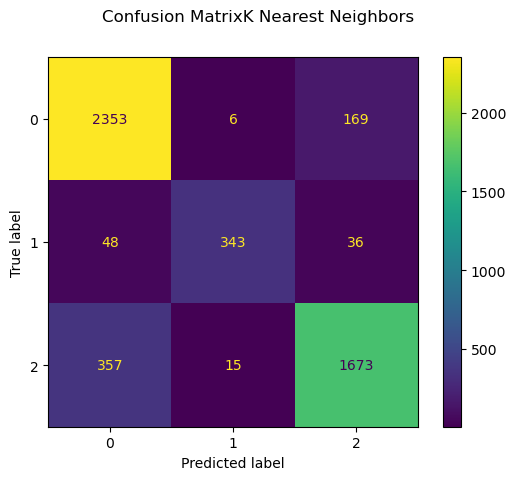

In [28]:
# plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix
disp = metrics.plot_confusion_matrix(knn_clf, X_test, y_test)
disp.figure_.suptitle("Confusion MatrixK Nearest Neighbors ")
print(f"Confusion matrix :\n{disp.confusion_matrix}")

plt.show()



Confusion matrix :
[[2435   66   12]
 [  24  382    0]
 [   6    2 2073]]


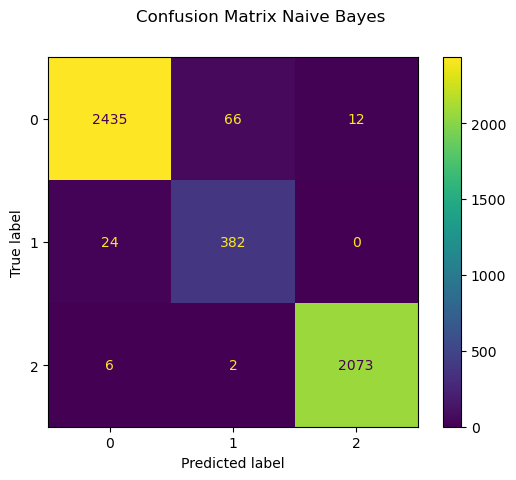

In [29]:
# plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix
disp = metrics.plot_confusion_matrix(gb_clf,X_test_gnb, y_test_gnb)
disp.figure_.suptitle("Confusion Matrix Naive Bayes")
print(f"Confusion matrix :\n{disp.confusion_matrix}")
plt.show()

Confusion matrix :
[[2495   22   11]
 [  29  397    1]
 [   3    0 2042]]


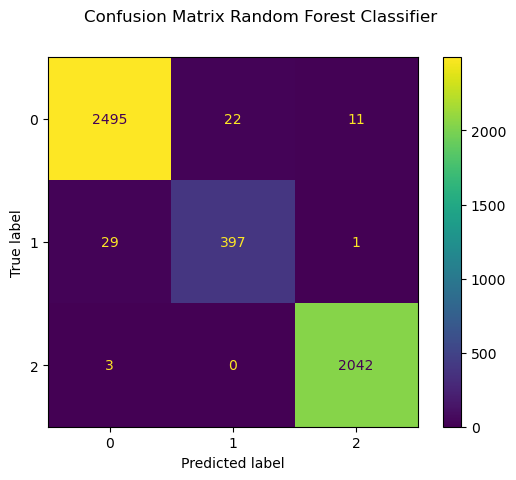

In [30]:
disp = metrics.plot_confusion_matrix(rm_clf,X_test, y_test)
disp.figure_.suptitle("Confusion Matrix Random Forest Classifier")
print(f"Confusion matrix :\n{disp.confusion_matrix}")
plt.show()

Confusion matrix :
[[2408    3  117]
 [  52  353   22]
 [ 339    0 1706]]


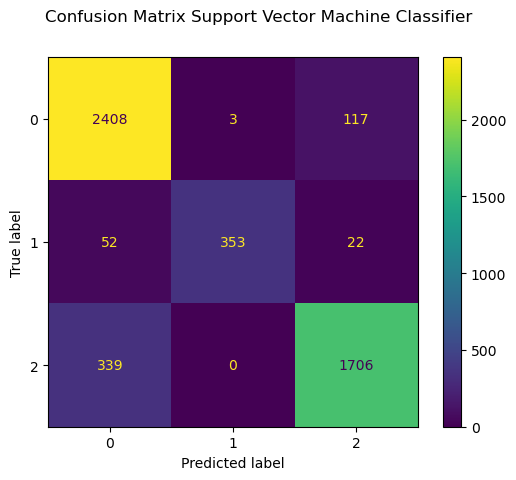

In [31]:
disp = metrics.plot_confusion_matrix(clfv,X_test, y_test)
disp.figure_.suptitle("Confusion Matrix Support Vector Machine Classifier ")
print(f"Confusion matrix :\n{disp.confusion_matrix}")
plt.show()

Confusion matrix :
[[2446   16   66]
 [  40  386    1]
 [  29    0 2016]]


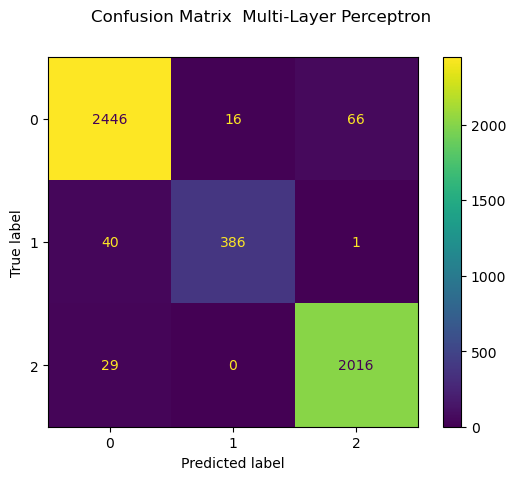

In [32]:

disp = metrics.plot_confusion_matrix(clfmpc,X_test, y_test)
disp.figure_.suptitle("Confusion Matrix  Multi-Layer Perceptron")
print(f"Confusion matrix :\n{disp.confusion_matrix}")
plt.show()

**Task: Comment on what you see the best classifier is likely to be (1 point).** You can also comment on the misclassification and confusion rates.

Comments :As we can see in the three confusions matrix the diagonal has high numbers. Outside the diagonal, we have small numbers, which is good because it means that the algorithm predicts a few times the wrong label.

### 2.4.a K Fold Cross Validation
We will now perform k fold cross valdiation for the classifiers. We use the function ``cross_val_score`` on each ewstimator, on the training set, with 10 folds, and use accuracy as a score metric.

**Task: perform the cross validation over K folds, output the mean and standard deviation of the accuracy (3 points)**

In [33]:
from sklearn.model_selection import cross_val_score

scores_knn_clf = cross_val_score(knn_clf, X_train, y_train, cv=10, scoring= 'accuracy')
print("K-nearest neighbors Mean:", scores_knn_clf.mean(),"Standard Deviation:", scores_knn_clf.std())


scores_gb_clf = cross_val_score(gb_clf, X_train_gnb, y_train_gnb, cv=10, scoring= 'accuracy')
print("Naive Bayes Mean :", scores_gb_clf.mean(),"Standard Deviation:", scores_gb_clf.std())


scores_rm_clf  = cross_val_score(rm_clf , X_train, y_train, cv=10, scoring= 'accuracy')
print(" Random Forest Classifier Mean:", scores_rm_clf .mean(),"Standard Deviation:", scores_rm_clf .std())

scores_clfv = cross_val_score(clfv, X_train, y_train, cv=10, scoring= 'accuracy')
print("Support Vector Machine Classifier  Mean:", scores_clfv.mean(),"Standard Deviation:", scores_clfv.std())


scores_clfmpc = cross_val_score(clfmpc, X_train, y_train, cv=10, scoring= 'accuracy')
print(" Multi-Layer Perceptron Mean:", scores_clfmpc.mean(),"Standard Deviation:", scores_clfmpc.std())

#print(scores)
#y_train_pred = cross_val_predict(clf,X_train,y_train,cv=3)
# print("K-nearest neighbors Mean:", scores_knn.mean(),"Standard Deviation:", scores_knn.std())

K-nearest neighbors Mean: 0.883974749498998 Standard Deviation: 0.032070402995756815
Naive Bayes Mean : 0.972793987975952 Standard Deviation: 0.004668403649489595
 Random Forest Classifier Mean: 0.9895975951903809 Standard Deviation: 0.004883415550489775
Support Vector Machine Classifier  Mean: 0.9017803607214429 Standard Deviation: 0.026569825283579446
 Multi-Layer Perceptron Mean: 0.9677931863727455 Standard Deviation: 0.008317748907472718


**Task: Which method won the Xval test (1 point) ?**

Random Forest Classifier

<!-- answer here -->





### 2.4.c And the winner is ...

Let's compare the results. 
**Task: Create a pandas dataframe with all of the performance metrics, including the results from K-fold cross validation. (2 points)**

In [34]:
# create data frame
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 'Random Forest', 'SVC','ANN'],
    'Accuracy': [accuracyK,accuracyG,accuracyR,accuracyC,accuracyML,],
    'Precision': [precisionK.mean(), precisionG.mean(),precisionR.mean() , precisionC.mean(),precisionML.mean()],
    'Recall': [recallK.mean(), recallG.mean(),recallR.mean(), recallC.mean(),recallML.mean()],
    'Fscore': [fscoreK.mean(),fscoreG.mean() ,fscoreR.mean(), fscoreC.mean(),fscoreML.mean()],
    'Kfold_accuracy_mean': [scores_knn_clf.mean(),scores_gb_clf.mean(),scores_rm_clf .mean(),scores_clfv.mean(),scores_clfmpc.mean(),],
    'Kfold_accuracy_std': [scores_knn_clf.std(),scores_gb_clf.std(),scores_rm_clf .std(),scores_clfv.std(),scores_clfmpc.std(),]})
results2=results.sort_values(by='Fscore', ascending=False)
print(results2)

           Model  Accuracy  Precision    Recall    Fscore  \
2  Random Forest    0.9868   0.976330  0.971741  0.974005   
4            ANN    0.9696   0.966866  0.952455  0.959348   
1    Naive Bayes    0.9780   0.943654  0.968668  0.955342   
3            SVC    0.8934   0.925514  0.871153  0.894285   
0            KNN    0.8738   0.895434  0.850716  0.870151   

   Kfold_accuracy_mean  Kfold_accuracy_std  
2             0.989598            0.004883  
4             0.967793            0.008318  
1             0.972794            0.004668  
3             0.901780            0.026570  
0             0.883975            0.032070  


**Task: Comment on the accuracy and performance and choose a winner. (1 point)**

As we can see in the tables Random forest and ANN are the best approaches because the accuracy that they have is most close to one (the highest value). Finally, random forest is the approach with the best performance.

<!-- answer here -->






## 3 Summary (4 points)

### 3.1 Feature Importance using Random Forest Classifier

Decision Trees have the unique property of being able to order features by their ability to split between the classes. If some features dominate over other in the predictive power of classes, one can further reduce the dimension of the features for additional analysis. The vector of feature importance is the module ``rfc.feature_importances_``, sorted with ascending importance. Store the vector of importance .

**Task: plot a bar plot using the function ``matplotlib.pyplot.bar``. (2 points)**

[0.013795859799608798, 0.010322503251703006, 0.4643433380663854, 0.1593171233783377, 0.14326379984472157, 0.011305726240206143, 0.08836640138587146, 0.1092852480331659]
[0 1 2 3 4 5 6 7]


Text(0.5, 0, 'Importance')

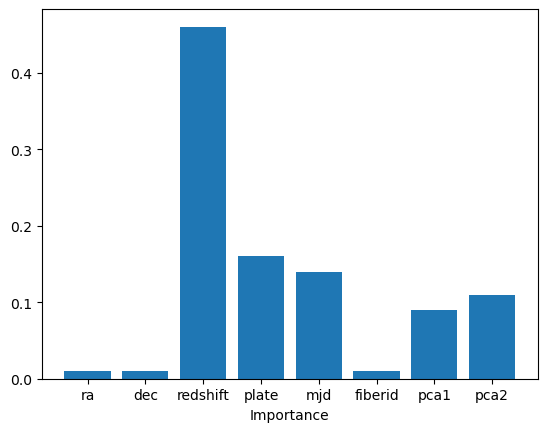

In [43]:
# answer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
#matplotlib.pyplot.bar
# vector of importance
importances = list(rm_clf.feature_importances_)
print(importances)
# vector of features
cordinate=np.arange(0,8)
altura=np.arange(0,8)
print(altura)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(Dataf.columns), importances)]
altura= feature_importances
plt.bar(x=cordinate,height=[h[1] for h in altura], tick_label=[h[0] for h in altura])
plt.xlabel('Features')
plt.xlabel('Importance')




**Task: What are the top three features (1 point)?**

According to the plot Redshift is the most importance feature, the is plate number and mjd which is the date.

<!-- answer -->

In this notebook, you have learned that redshift was the best predictor of what object you are observing. Now, did you actualy need to do this all to find this out? Probably not if you were an astrophysicist! But hey, we are not. So great job!

**Task: Briefly comment on what you have learned (1 point)**
I have learned how to study a data set with different predictions approach and decide which has better performance according to they score values. I was a good example to practice all the stuff that we saw in classes :). Also, I liked to do interpretations about confusion matrix means.

## Bonus questions (5 points)


Perform hyperparameter tuning and ensemble learning to improve on the classification performance.

In [44]:
# answer below
print(rm_clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
from sklearn import svm, datasets
 from sklearn.model_selection import GridSearchCV
  #  parameters = 
  #search in the grid

<!-- answer -->